In [1]:
pip install -Uqq fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

Define function to search images here we will use duck duck go

In [3]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [3]:
dhams = [ 'kedarnath','badrinath','yamunotri','gangotri']
path = Path('Data')

In [5]:
if not path.exists():
    path.mkdir()
    for dham in dhams:  
        dest = (path/dham)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{dham} temple')
        download_images(dest,urls = results)
        print(f'downloaded images of {dham}')

In [4]:
fns = get_image_files(path)
fns

(#741) [Path('Data/kedarnath/e17b1a40-62a1-4c50-bc7d-2305ee92fb19.jpg'),Path('Data/kedarnath/2705d756-364e-4e91-9ee7-e54942f69b2c.jpg'),Path('Data/kedarnath/68d32b1e-f365-429a-b8e6-c3553e5f0a68.jpg'),Path('Data/kedarnath/5d72ed8e-6934-4702-9618-7b1147f676a6.jpg'),Path('Data/kedarnath/dca52b89-ce71-413c-a1ed-18bdb039f814.jpg'),Path('Data/kedarnath/2ef827da-02e8-4744-9968-0d8d561bf0c4.jpg'),Path('Data/kedarnath/b17d2b91-ed42-40ba-b193-f215c8741570.jpg'),Path('Data/kedarnath/dcfd4926-605c-4c9f-880d-f9f56b11e770.jpg'),Path('Data/kedarnath/54fe9e4e-517d-4741-8ced-1c58160433cc.jpg'),Path('Data/kedarnath/438fb96e-cbc6-4a8f-8f69-d40e8b894e1a.jpg')...]

In [5]:
failed = verify_images(fns)

In [6]:
failed.map(Path.unlink);

In [7]:
temple = DataBlock(
    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = temple.dataloaders(path)

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

/home/arjun/Arjun/dhaam-classifier/env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.750007,0.480776,0.148649,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.403669,0.361563,0.087838,00:11
1,0.296555,0.320724,0.074324,00:11
2,0.236755,0.346526,0.060811,00:11
3,0.193274,0.344866,0.060811,00:11


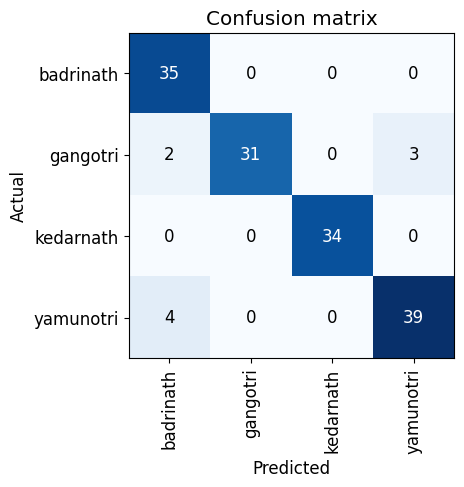

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

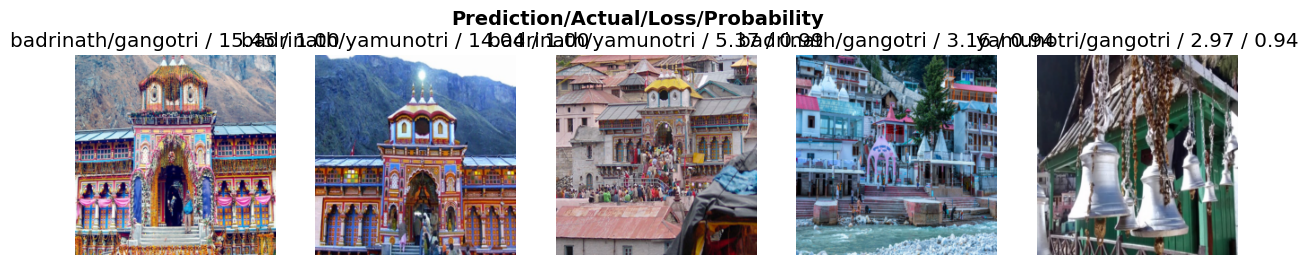

In [12]:
interp.plot_top_losses(5, nrows=1)

In [19]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()

In [6]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [7]:
learn_inf = load_learner(path/'export.pkl')

In [8]:
learn_inf.predict('gangotri.jpg')

('gangotri', TensorBase(1), TensorBase([0.0228, 0.8363, 0.0978, 0.0431]))

In [9]:
learn_inf.dls.vocab

NameError: name 'learn' is not defined